<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/%E5%88%86%E6%9E%90%E8%99%9B%E6%93%AC%E8%B2%A8%E5%B9%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 設定

In [71]:
!pip install finlab_crypto > log.txt

In [72]:
import finlab_crypto
finlab_crypto.setup()

# 載入歷史價格資料

In [73]:
ohlcv = finlab_crypto.crawler.get_all_binance('ETHUSDT', '4h')
ohlcv.head()

All caught up..!


,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00+00:00,301.13,307.96,298.00,307.96,1561.95305,1.502957e+12,473487.665119,711.0,1260.38649,382097.159931,46884.543391
2017-08-17 08:00:00+00:00,307.95,312.00,307.00,308.95,1177.71088,1.502971e+12,364545.316402,775.0,1093.84885,338587.602684,46866.630800
2017-08-17 12:00:00+00:00,308.95,310.51,303.56,307.06,1882.05267,1.502986e+12,578644.931890,1140.0,1742.14642,535627.140019,47528.189091
2017-08-17 16:00:00+00:00,307.74,312.18,298.21,301.60,1208.05192,1.503000e+12,370209.051467,957.0,1097.32020,336546.179782,48886.753370
2017-08-17 20:00:00+00:00,301.60,310.85,299.01,302.00,1200.94182,1.503014e+12,367768.335479,939.0,1030.88803,315847.286114,50579.872288


In [74]:
ohlcv.tail()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2021-01-01 12:00:00+00:00,738.85,743.33,732.12,735.39,121504.02184,1.609517e+12,8.966374e+07,84247.0,65878.41968,4.862858e+07,0.0
2021-01-01 16:00:00+00:00,735.39,737.73,714.29,725.34,156457.71927,1.609531e+12,1.137982e+08,100467.0,71977.06431,5.237472e+07,0.0
2021-01-01 20:00:00+00:00,725.34,731.97,722.50,728.91,65676.83838,1.609546e+12,4.783778e+07,48186.0,33274.20651,2.423802e+07,0.0
2021-01-02 00:00:00+00:00,728.91,734.40,714.91,730.39,119184.44960,1.609560e+12,8.646377e+07,75165.0,61460.03639,4.460037e+07,0.0
2021-01-02 04:00:00+00:00,730.39,730.67,726.26,729.50,10946.18450,1.609574e+12,7.972389e+06,7624.0,5163.75340,3.760678e+06,0.0


# 定義策略

In [75]:
@finlab_crypto.Strategy(n1=20, n2=60)
def sma_strategy(ohlcv):
  n1 = sma_strategy.n1
  n2 = sma_strategy.n2

  sma1 = ohlcv.close.rolling(int(n1)).mean()
  sma2 = ohlcv.close.rolling(int(n2)).mean()
  return (sma1 > sma2), (sma1 < sma2)

# 回測

In [76]:
vars =  {'n1': 20, 'n2': 60}
portfolio = sma_strategy.backtest(ohlcv, vars,freq='4h', plot=True)

# 優化

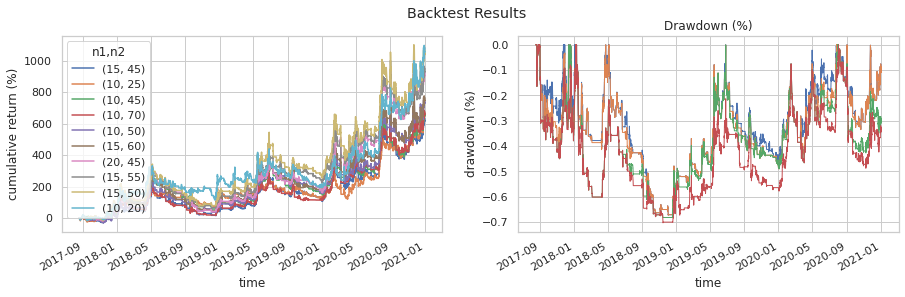

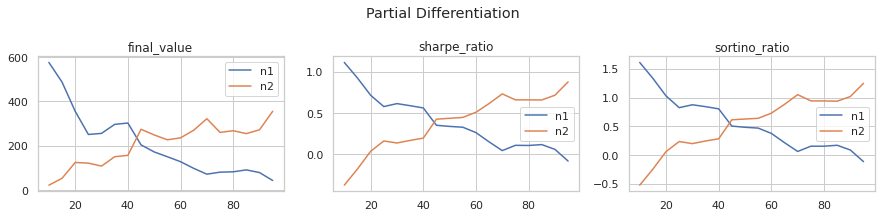

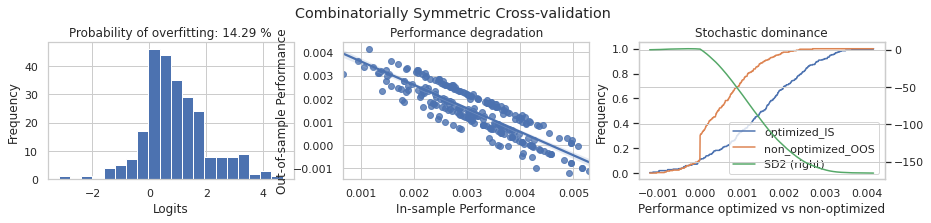

Output()

In [77]:
import numpy as np

vars = {
  'n1': np.arange(10, 100, 5), 
  'n2': np.arange(10, 100, 5)
}

portfolio = sma_strategy.backtest(ohlcv, vars ,freq='4h', plot=True)

In [78]:
vars =  {'n1': 80, 'n2': 95}
portfolio = sma_strategy.backtest(ohlcv, vars,freq='4h', plot=True)

# 產生交易訊號(現在)

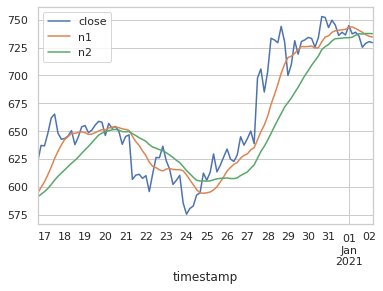

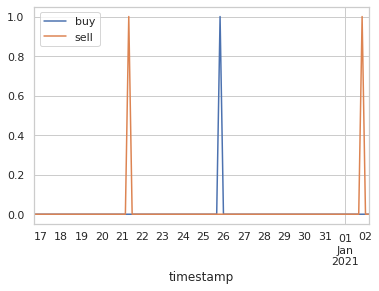

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
 
V1 = 10
V2 = 20
table = pd.DataFrame()
table['close'] = ohlcv.close
table['n1'] = ohlcv.close.rolling(V1).mean()
table['n2'] = ohlcv.close.rolling(V2).mean()
table.tail(100).plot()
table['buy'] = ((table['n1']>table['n2'])&(table['n1'].shift()<table['n2'].shift())).astype(int)
table['sell'] = ((table['n1']<table['n2'])&(table['n1'].shift()>table['n2'].shift())).astype(int)
table[['buy','sell']].tail(100).plot()